In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from binance.client import Client
from sklearn.model_selection import train_test_split
import time
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import smtplib
import email
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
#warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from datetime import datetime
from binance.exceptions import BinanceAPIException
import telegram # Importa bibliotecas do Adriano
from telegram.ext import Updater, CommandHandler  #Importa bibliotecas do Adriano
%matplotlib inline

In [2]:
def data_historico(par,candle,time_aq):
    """
    Função que recupera os dados históricos de um Par
    
    """
    
    hist1 = client.get_historical_klines(par, candle, time_aq)
    
    open_time = []; Open = []; High = []; Low = []; Close = []; Volume = []
    Close_time = [] ;Quote_asset_volume = []; Number_of_trades = []
    #Taker_buy_base_asset_volume = []; Taker_buy_quote_asset_volume = [] ; Can_be_ignored = []
    for i in range(0,len(hist1)):
        open_time.append(float(hist1[i][0])); Open.append(float(hist1[i][1])); 
        High.append(float(hist1[i][2])); Low.append(float(hist1[i][3]))
        Close.append(float(hist1[i][4])); Volume.append(float(hist1[i][5]))
        Close_time.append(float(hist1[i][6])); #Quote_asset_volume.append(float(hist1[i][7]))
        Number_of_trades.append(float(hist1[i][8]))#; Taker_buy_base_asset_volume.append(float(hist1[i][9]))
        #Taker_buy_quote_asset_volume.append(float(hist1[i][10])); Can_be_ignored.append(float(hist1[i][11]))
    
    ts_open_time = [datetime.fromtimestamp(x/1000) for x in open_time]
    ts_close_time = [datetime.fromtimestamp(x/1000) for x in Close_time]
    
    d = {'Open_time': ts_open_time,'Open': Open, 'High': High, 'Low': Low, 'Close': Close, 
         'Close_time': ts_close_time, 'Volume': Volume, 'N_of_trades': Number_of_trades}
    df_hist = pd.DataFrame(data=d, index=ts_open_time)
    
    return df_hist #open_time,Open,High,Low,Close,Close_time,Volume,Number_of_trades 


In [13]:
# As informações abaixo devem ser colocadas num arquivo config.txt
api_key = '7krPI9NVlWK5xWMAqhx40y5TMi95b6TCMPGSBMftIw9BtxaA8y2MVFzmVUOZkrxz' 
api_secret = 'ih9lrxdq91UVIAQKvfV1xMrZP8s5TB5oxxZ0vG0BjrKaxt2AMqgejarCVMVesSBh'       
client = Client(api_key, api_secret)
time_aq =  '90 day ago UTC'
candle = '30m'
par = 'BTCUSDT'

In [14]:
#hist_par = client.get_historical_klines(par, candle, time_aq)
hist = data_historico(par, candle, time_aq)

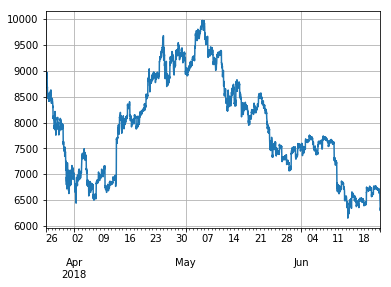

In [15]:
hist['Open'].plot(grid=True)
plt.show()


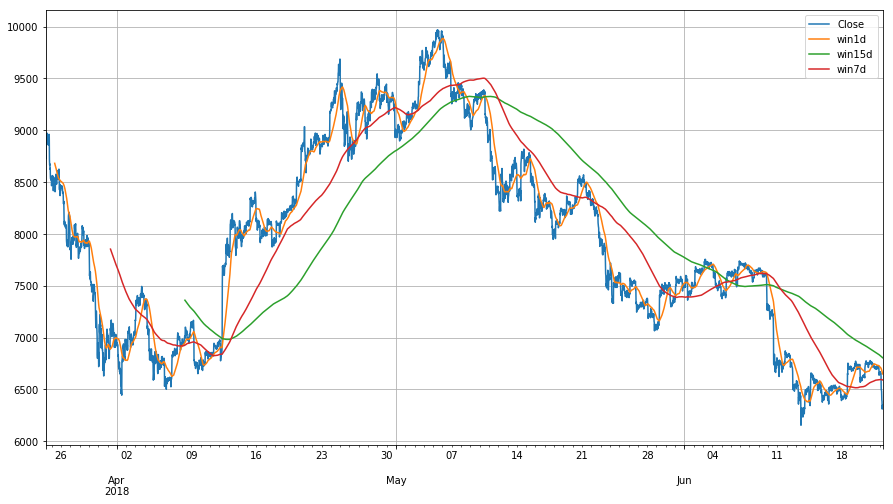

In [16]:
hist['win1d'] = hist['Close'].rolling(window=48).mean()
hist['win15d'] = hist['Close'].rolling(window=48*15).mean()
hist['win7d'] = hist['Close'].rolling(window=48*7).mean()
hist[['Close','win1d','win15d','win7d']].plot(grid=True, figsize=(15,8))
plt.show()

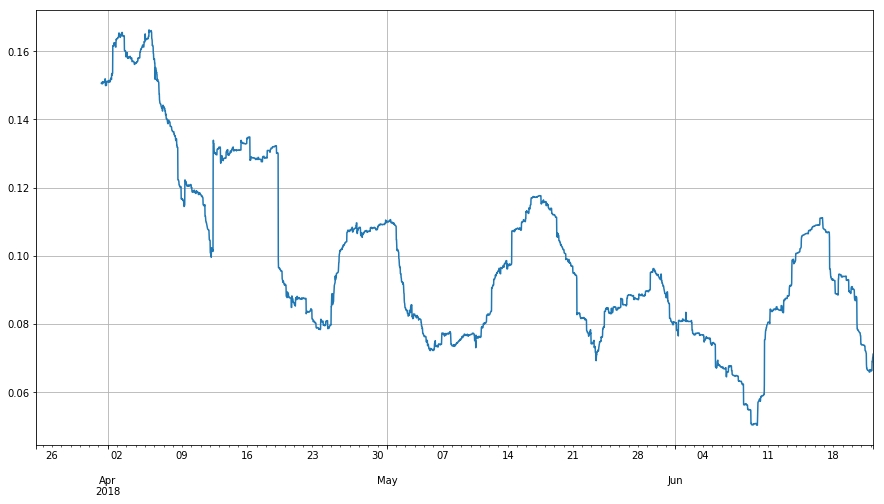

In [18]:
p = 48*7
vol = hist['Close'].pct_change().fillna(0).rolling(p).std()*np.sqrt(p)
vol.plot(grid=True, figsize=(15,8))
plt.show()

In [16]:
import pandas_datareader as pdr
import datetime 
aapl = pdr.get_data_quandl('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))

pandas._libs.tslib.Timestamp